### House Price Prediction

In [1]:
import pandas as pd
import torch
import torch.nn as nn

Importing the Boston Housing Database

In [2]:
df = pd.read_csv("BostonHousing.csv")
df.head()

,crime,landzone,indus,chas,nox,room,age,distance,rad,tax,ptratio,b,lstatus,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
x = df.drop('price', axis=1)
y = df['price']

In [4]:
x = x.values
y = y.values

Scaling the database to to equaily fit every features 

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)  # Scaling features

In [6]:
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)  

Splitting the database for training and testing the models

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
type(x), type(y), type(X_scaled),type(y_train)

(numpy.ndarray, torch.Tensor, torch.Tensor, torch.Tensor)

#### Visualize the dataset

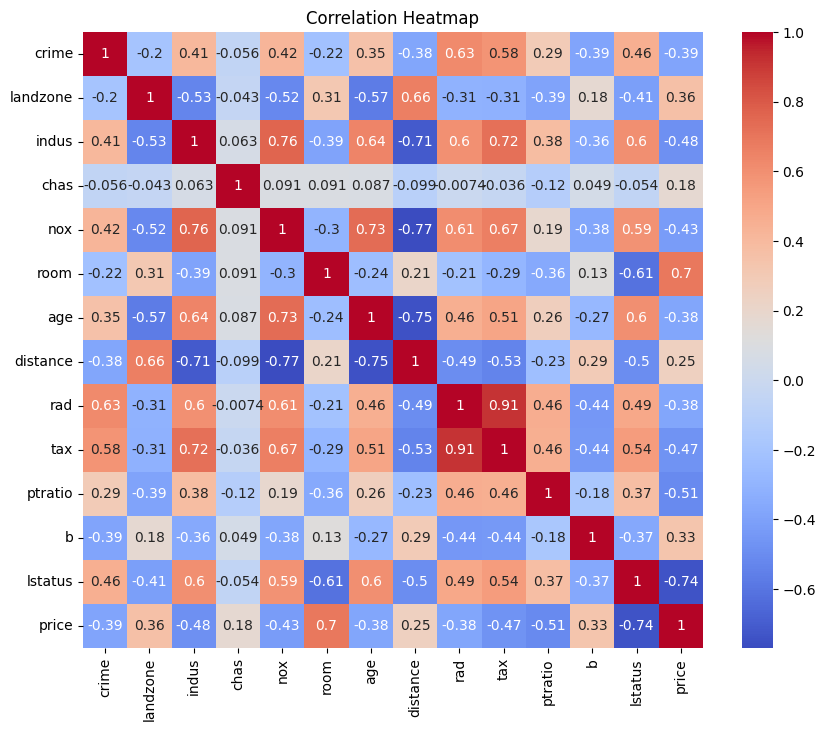

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

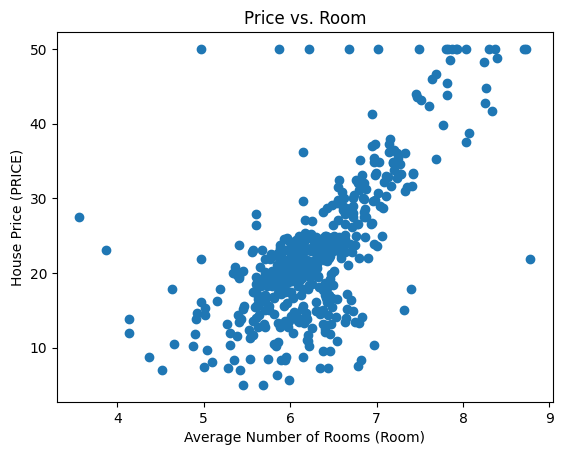

In [10]:
# Scatter plot of RM (average number of rooms per dwelling) vs PRICE
plt.scatter(df['room'], df['price'])
plt.xlabel('Average Number of Rooms (Room)')
plt.ylabel('House Price (PRICE)')
plt.title('Price vs. Room')
plt.show()

Text(0.5, 1.0, 'Price vs Population Status')

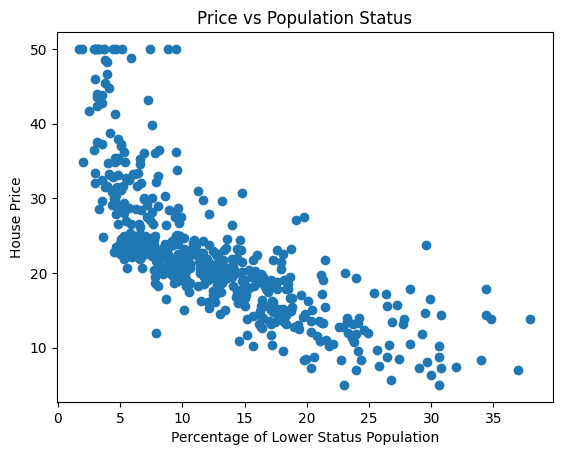

In [42]:
# scatter plot of lstat vs price
plt.scatter(df['lstatus'], df['price'])
plt.xlabel('Percentage of Lower Status Population')
plt.ylabel('House Price')
plt.title('Price vs Population Status')

#### Building a Linear Regression Model

In [12]:
import torch.nn as nn

# Define a simple Linear Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # 1 output, since we are predicting house price
        
    def forward(self, x):
        return self.linear(x)

# Initialize the model
input_dim = X_train.shape[1]
model = LinearRegressionModel(input_dim)

# Loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

#### Building a neural network

In [13]:
class NeuralNet(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 1)  # 1 output (price prediction)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model
model_nn = NeuralNet(input_dim=input_dim, hidden_dim=64)  # e.g., 64 hidden units
optimizer_nn = torch.optim.Adam(model_nn.parameters(), lr=0.001)

#### Training the Linear model

In [14]:
# Train the Linear Regression Model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass: Compute prediction
    y_pred_train = model(X_train)
    
    # Compute loss
    loss = criterion(y_pred_train, y_train)
    
    # Backward pass: Compute gradient and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 32.8432
Epoch [200/1000], Loss: 22.7387
Epoch [300/1000], Loss: 22.1800
Epoch [400/1000], Loss: 21.9757
Epoch [500/1000], Loss: 21.8621
Epoch [600/1000], Loss: 21.7940
Epoch [700/1000], Loss: 21.7508
Epoch [800/1000], Loss: 21.7220
Epoch [900/1000], Loss: 21.7019
Epoch [1000/1000], Loss: 21.6874


#### Training the neural network model

In [15]:
# Train the Neural Network Model
num_epochs = 1000
for epoch in range(num_epochs):
    model_nn.train()
    
    # Forward pass: Compute prediction
    y_pred_train = model_nn(X_train)
    
    # Compute loss
    loss = criterion(y_pred_train, y_train)
    
    # Backward pass: Compute gradient and update the weights
    optimizer_nn.zero_grad()
    loss.backward()
    optimizer_nn.step()
    
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], NN Loss: {loss.item():.4f}')

Epoch [100/1000], NN Loss: 398.2079
Epoch [200/1000], NN Loss: 139.3848
Epoch [300/1000], NN Loss: 47.6663
Epoch [400/1000], NN Loss: 27.9876
Epoch [500/1000], NN Loss: 23.1443
Epoch [600/1000], NN Loss: 20.2282
Epoch [700/1000], NN Loss: 17.9668
Epoch [800/1000], NN Loss: 16.1369
Epoch [900/1000], NN Loss: 14.6407
Epoch [1000/1000], NN Loss: 13.3944


#### Testing the Linear Model

In [16]:
model.eval()  # Set to evaluation mode
with torch.no_grad():  # No need to track gradients
    y_pred_test = model(X_test)
    test_loss = criterion(y_pred_test, y_test)
    for i in range(len(y_pred_test)):
        print(f"y_eval: {y_pred_test[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test[i].item() - y_test[i]}.")
    rmse = torch.sqrt(test_loss)
    print(f'Linear Regression Test RMSE: {rmse.item():.4f}')

y_eval: 28.982158660888672, y_test: tensor([23.6000]), diff: tensor([5.3822]).
y_eval: 35.836936950683594, y_test: tensor([32.4000]), diff: tensor([3.4369]).
y_eval: 15.772266387939453, y_test: tensor([13.6000]), diff: tensor([2.1723]).
y_eval: 25.011077880859375, y_test: tensor([22.8000]), diff: tensor([2.2111]).
y_eval: 18.718116760253906, y_test: tensor([16.1000]), diff: tensor([2.6181]).
y_eval: 23.39689826965332, y_test: tensor([20.]), diff: tensor([3.3969]).
y_eval: 17.685487747192383, y_test: tensor([17.8000]), diff: tensor([-0.1145]).
y_eval: 14.546716690063477, y_test: tensor([14.]), diff: tensor([0.5467]).
y_eval: 22.818735122680664, y_test: tensor([19.6000]), diff: tensor([3.2187]).
y_eval: 20.817747116088867, y_test: tensor([16.8000]), diff: tensor([4.0177]).
y_eval: 24.687667846679688, y_test: tensor([21.5000]), diff: tensor([3.1877]).
y_eval: 18.668310165405273, y_test: tensor([18.9000]), diff: tensor([-0.2317]).
y_eval: -6.042196273803711, y_test: tensor([7.]), diff: ten

#### Testing the neural network model

In [17]:
# Evaluation on test data (Neural Network)
model_nn.eval()
with torch.no_grad():
    y_pred_test_nn = model_nn(X_test)
    test_loss_nn = criterion(y_pred_test_nn, y_test)
    for i in range(len(y_pred_test_nn)):
        print(f"y_eval: {y_pred_test_nn[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_nn[i].item() - y_test[i]}.")
    rmse_nn = torch.sqrt(test_loss_nn)
    print(f'Neural Network Test RMSE: {rmse_nn.item():.4f}')

y_eval: 28.029870986938477, y_test: tensor([23.6000]), diff: tensor([4.4299]).
y_eval: 33.22890853881836, y_test: tensor([32.4000]), diff: tensor([0.8289]).
y_eval: 20.720407485961914, y_test: tensor([13.6000]), diff: tensor([7.1204]).
y_eval: 27.101533889770508, y_test: tensor([22.8000]), diff: tensor([4.3015]).
y_eval: 17.088367462158203, y_test: tensor([16.1000]), diff: tensor([0.9884]).
y_eval: 20.538755416870117, y_test: tensor([20.]), diff: tensor([0.5388]).
y_eval: 15.184279441833496, y_test: tensor([17.8000]), diff: tensor([-2.6157]).
y_eval: 14.583383560180664, y_test: tensor([14.]), diff: tensor([0.5834]).
y_eval: 22.222349166870117, y_test: tensor([19.6000]), diff: tensor([2.6223]).
y_eval: 15.809534072875977, y_test: tensor([16.8000]), diff: tensor([-0.9905]).
y_eval: 20.361963272094727, y_test: tensor([21.5000]), diff: tensor([-1.1380]).
y_eval: 15.531698226928711, y_test: tensor([18.9000]), diff: tensor([-3.3683]).
y_eval: 7.032504558563232, y_test: tensor([7.]), diff: te

In [18]:
# Extract the learned coefficients (Linear Regression)
coefficients = model.linear.weight.detach().numpy().flatten()
features = df.columns[:-1]  # All feature names

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

print(importance_df)

     Feature  Coefficient
5       room     3.170500
8        rad     1.731661
11         b     1.125897
3       chas     0.731331
1   landzone     0.590529
2      indus     0.096500
6        age    -0.194444
0      crime    -0.923061
9        tax    -1.204508
4        nox    -1.895243
10   ptratio    -1.950702
7   distance    -2.956100
12   lstatus    -3.607302


#### Ridge regression model

Building the Ridge Regression model

In [19]:
def ridge_loss(output, target, modl, alpha):
    mse_loss = nn.MSELoss()(output, target)
    l2_reg = torch.tensor(0.)
    for param in modl.parameters():
        l2_reg += torch.norm(param)
    return l2_reg + mse_loss + alpha

model_ridge = LinearRegressionModel(input_dim)
optimizer_ridge = torch.optim.SGD(model_ridge.parameters(), lr=0.01)

Training the ridge model

In [20]:
num_epochs = 1000
for epoch in range(num_epochs):
    model_ridge.train()
    y_pred_train = model_ridge(X_train)
    
    loss_ridge = ridge_loss(y_pred_train, y_train, model_ridge, 0.1)
    
    optimizer_ridge.zero_grad()
    loss_ridge.backward()
    optimizer_ridge.step()
    
    if (epoch) % 99 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss_ridge.item():.10f}')

Epoch [1/1000], Loss: 609.8441162109
Epoch [100/1000], Loss: 60.1164169312
Epoch [199/1000], Loss: 50.8740615845
Epoch [298/1000], Loss: 50.5217857361
Epoch [397/1000], Loss: 50.4493293762
Epoch [496/1000], Loss: 50.4211921692
Epoch [595/1000], Loss: 50.4090652466
Epoch [694/1000], Loss: 50.4035339355
Epoch [793/1000], Loss: 50.4008865356
Epoch [892/1000], Loss: 50.3995590210
Epoch [991/1000], Loss: 50.3988685608


Testing the model

In [21]:
model_ridge.eval()
with torch.no_grad():
    y_pred_test_ridge = model_ridge(X_test)
    test_loss_ridge = criterion(y_pred_test_ridge, y_test)
    for i in range(len(y_pred_test_ridge)):
        print(f"y_eval: {y_pred_test_ridge[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_ridge[i].item() - y_test[i]}.")
    rmse_ridge = torch.sqrt(test_loss_ridge)
    print(f'Neural Network Test RMSE: {rmse_ridge.item():.4f}')

y_eval: 27.8740234375, y_test: tensor([23.6000]), diff: tensor([4.2740]).
y_eval: 34.36256408691406, y_test: tensor([32.4000]), diff: tensor([1.9626]).
y_eval: 15.973040580749512, y_test: tensor([13.6000]), diff: tensor([2.3730]).
y_eval: 24.246234893798828, y_test: tensor([22.8000]), diff: tensor([1.4462]).
y_eval: 18.15837287902832, y_test: tensor([16.1000]), diff: tensor([2.0584]).
y_eval: 22.69770050048828, y_test: tensor([20.]), diff: tensor([2.6977]).
y_eval: 17.7166748046875, y_test: tensor([17.8000]), diff: tensor([-0.0833]).
y_eval: 14.53805923461914, y_test: tensor([14.]), diff: tensor([0.5381]).
y_eval: 21.34196662902832, y_test: tensor([19.6000]), diff: tensor([1.7420]).
y_eval: 20.457927703857422, y_test: tensor([16.8000]), diff: tensor([3.6579]).
y_eval: 23.97563362121582, y_test: tensor([21.5000]), diff: tensor([2.4756]).
y_eval: 19.141420364379883, y_test: tensor([18.9000]), diff: tensor([0.2414]).
y_eval: -5.147026062011719, y_test: tensor([7.]), diff: tensor([-12.1470

In [22]:
coefficients_ridge = model_ridge.linear.weight.detach().numpy().flatten()

importance_df_ridge = pd.DataFrame({'Feature': features, 'Coefficient': coefficients_ridge})
importance_df_ridge = importance_df_ridge.sort_values(by='Coefficient', ascending=False)

print(importance_df_ridge)

     Feature  Coefficient
5       room     3.184540
11         b     1.046179
8        rad     0.950994
3       chas     0.765923
1   landzone     0.360259
2      indus    -0.162221
6        age    -0.187027
9        tax    -0.720585
0      crime    -0.777514
4        nox    -1.283061
10   ptratio    -1.784281
7   distance    -2.174394
12   lstatus    -3.277980


#### Lasso Regression model 

Building the model

In [23]:
def lasso_loss(output, target, model, alpha):
    mse_loss = nn.MSELoss()(output, target)
    l1_reg = torch.tensor(0.)
    for param in model.parameters():
        l1_reg += torch.sum(torch.abs(param))
    return mse_loss + alpha + l1_reg

model_lasso = LinearRegressionModel(input_dim)
optimizer_lasso = torch.optim.SGD(model_lasso.parameters(), lr=0.01)

Training the model

In [24]:
epochs = 1000

for epoch in range(epochs):
    model_lasso.train()

    y_pred_train = model_lasso(X_train)

    loss_lasso = lasso_loss(y_pred_train, y_train, model_lasso, 0.1)

    optimizer_lasso.zero_grad()
    loss_lasso.backward()
    optimizer_lasso.step()

    if (epoch+1) % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss_lasso.item():.4f}")

Epoch: 99, Loss: 66.7116


Epoch: 199, Loss: 57.7970
Epoch: 299, Loss: 57.5994
Epoch: 399, Loss: 57.5984
Epoch: 499, Loss: 57.5876
Epoch: 599, Loss: 57.6018
Epoch: 699, Loss: 57.5993
Epoch: 799, Loss: 57.5905
Epoch: 899, Loss: 57.5984
Epoch: 999, Loss: 57.5985


Testing the model

In [25]:
model_lasso.eval()
with torch.no_grad():
    y_pred_test_lasso = model_lasso(X_test)
    test_loss_lasso = criterion(y_pred_test_lasso, y_test)
    for i in range(len(y_pred_test_lasso)):
        print(f"y_eval: {y_pred_test_lasso[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_lasso[i].item() - y_test[i]}.")
    rmse_lasso = torch.sqrt(test_loss_lasso)
    print(f'Neural Network Test RMSE: {rmse_lasso.item():.4f}')

y_eval: 26.175073623657227, y_test: tensor([23.6000]), diff: tensor([2.5751]).
y_eval: 31.22610092163086, y_test: tensor([32.4000]), diff: tensor([-1.1739]).
y_eval: 17.31770896911621, y_test: tensor([13.6000]), diff: tensor([3.7177]).
y_eval: 24.024845123291016, y_test: tensor([22.8000]), diff: tensor([1.2248]).
y_eval: 18.848005294799805, y_test: tensor([16.1000]), diff: tensor([2.7480]).
y_eval: 22.22136688232422, y_test: tensor([20.]), diff: tensor([2.2214]).
y_eval: 17.711074829101562, y_test: tensor([17.8000]), diff: tensor([-0.0889]).
y_eval: 14.516199111938477, y_test: tensor([14.]), diff: tensor([0.5162]).
y_eval: 20.710559844970703, y_test: tensor([19.6000]), diff: tensor([1.1106]).
y_eval: 19.98202896118164, y_test: tensor([16.8000]), diff: tensor([3.1820]).
y_eval: 21.282331466674805, y_test: tensor([21.5000]), diff: tensor([-0.2177]).
y_eval: 20.44801902770996, y_test: tensor([18.9000]), diff: tensor([1.5480]).
y_eval: -3.195831298828125, y_test: tensor([7.]), diff: tensor

#### Support Vector Regressor

Building the model

In [26]:
class SupportVectorRegressor(nn.Module):
    def __init__(self, n_features, epsilon=0.1, c=1.0):
        super(SupportVectorRegressor, self).__init__()
        self.linear = nn.Linear(n_features, 1)
        self.epsilon = epsilon
        self.c = c

    def forward(self, x):
        return self.linear(x)
    
    def epsilon_intesive_loss(self, pred, targets):
        abs_error = torch.abs(pred - targets)
        loss = torch.where(abs_error < self.epsilon, torch.zeros_like(abs_error), abs_error - self.epsilon)
        return torch.mean(loss) + self.c + torch.sum(self.linear.weight ** 2)
    
svr_model = SupportVectorRegressor(input_dim)
optimizer_svr = torch.optim.SGD(svr_model.parameters(), lr=0.01)

Training the model

In [27]:
epochs = 1000
for epoch in range(epochs):
    y_pred = svr_model(X_train)
    loss_svr = svr_model.epsilon_intesive_loss(y_pred, y_train)

    optimizer_svr.zero_grad()
    loss_svr.backward()
    optimizer_svr.step()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss_svr.item()}")

Epoch: 0, Loss: 24.077505111694336


Epoch: 100, Loss: 22.87201690673828
Epoch: 200, Loss: 21.868404388427734
Epoch: 300, Loss: 20.868343353271484
Epoch: 400, Loss: 19.86834144592285
Epoch: 500, Loss: 18.868322372436523
Epoch: 600, Loss: 17.875568389892578
Epoch: 700, Loss: 16.897706985473633
Epoch: 800, Loss: 15.937495231628418
Epoch: 900, Loss: 15.016239166259766


Testing the model

In [28]:
with torch.no_grad():
    y_pred_test_svr = svr_model(X_test)
    test_loss_svr = svr_model.epsilon_intesive_loss(y_pred_test_svr, y_test)
    for i in range(len(y_pred_test_svr)):
        print(f"y_eval: {y_pred_test_svr[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_svr[i].item() - y_test[i]}.")
    rmse_svr = torch.sqrt(nn.MSELoss()(y_pred_test_svr, y_test))
    print(f'Neural Network Test RMSE: {rmse_svr.item():.4f}')

y_eval: 9.910544395446777, y_test: tensor([23.6000]), diff: tensor([-13.6895]).
y_eval: 10.168012619018555, y_test: tensor([32.4000]), diff: tensor([-22.2320]).
y_eval: 9.298843383789062, y_test: tensor([13.6000]), diff: tensor([-4.3012]).
y_eval: 9.969590187072754, y_test: tensor([22.8000]), diff: tensor([-12.8304]).
y_eval: 9.213820457458496, y_test: tensor([16.1000]), diff: tensor([-6.8862]).
y_eval: 9.756302833557129, y_test: tensor([20.]), diff: tensor([-10.2437]).
y_eval: 9.699383735656738, y_test: tensor([17.8000]), diff: tensor([-8.1006]).
y_eval: 9.355961799621582, y_test: tensor([14.]), diff: tensor([-4.6440]).
y_eval: 9.33705997467041, y_test: tensor([19.6000]), diff: tensor([-10.2629]).
y_eval: 9.650460243225098, y_test: tensor([16.8000]), diff: tensor([-7.1495]).
y_eval: 9.764153480529785, y_test: tensor([21.5000]), diff: tensor([-11.7358]).
y_eval: 9.872190475463867, y_test: tensor([18.9000]), diff: tensor([-9.0278]).
y_eval: 8.442691802978516, y_test: tensor([7.]), diff:

In [29]:
coefficients_svr = svr_model.linear.weight.detach().numpy().flatten()

importance_df_svr = pd.DataFrame({'Feature': features, 'Coefficient': coefficients_svr})
importance_df_svr = importance_df_svr.sort_values(by='Coefficient', ascending=False)

print(importance_df_svr)

     Feature  Coefficient
5       room     0.043544
7   distance     0.038131
11         b     0.035130
1   landzone     0.021266
3       chas     0.014567
6        age    -0.030935
4        nox    -0.032919
2      indus    -0.049396
10   ptratio    -0.059486
8        rad    -0.063230
0      crime    -0.065111
9        tax    -0.065998
12   lstatus    -0.080440


#### Tree Regressor Model ( Decision Tree, Random Forest, Gradient Boosting )

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

Training all the model

In [31]:
dtr_model = DecisionTreeRegressor(random_state=42)

dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [32]:
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)

rfr_model.fit(X_train, y_train)

C:\Users\IMCK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [33]:
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, random_state=42)

gbr_model.fit(X_train, y_train)

C:\Users\IMCK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.01, random_state=42)

Testing the Decision Tree Model

In [34]:
y_pred_test_dtr = dtr_model.predict(X_test)
loss_dtr = mean_squared_error(y_pred_test_dtr, y_test)
for i in range(len(y_pred_test_dtr)):
    print(f"y_eval: {y_pred_test_dtr[i].item():.4f}, y_test: {y_test[i].item():.4f}, diff: {y_pred_test_dtr[i].item() - y_test[i].item()}.")
rmse_dtr = (loss_dtr ** (1/2))
print(f'Neural Network Test RMSE: {rmse_dtr.item():.4f}')

y_eval: 25.0000, y_test: 23.6000, diff: 1.3999996185302734.
y_eval: 33.1000, y_test: 32.4000, diff: 0.6999969482421875.
y_eval: 15.2000, y_test: 13.6000, diff: 1.5999994277954102.
y_eval: 21.7000, y_test: 22.8000, diff: -1.0999984741210938.
y_eval: 20.0000, y_test: 16.1000, diff: 3.8999996185302734.
y_eval: 18.5000, y_test: 20.0000, diff: -1.5.
y_eval: 16.6000, y_test: 17.8000, diff: -1.1999988555908203.
y_eval: 16.7000, y_test: 14.0000, diff: 2.700000762939453.
y_eval: 22.6000, y_test: 19.6000, diff: 3.0.
y_eval: 22.0000, y_test: 16.8000, diff: 5.200000762939453.
y_eval: 18.8000, y_test: 21.5000, diff: -2.700000762939453.
y_eval: 19.5000, y_test: 18.9000, diff: 0.6000003814697266.
y_eval: 7.2000, y_test: 7.0000, diff: 0.19999980926513672.
y_eval: 21.5000, y_test: 21.2000, diff: 0.2999992370605469.
y_eval: 18.7000, y_test: 18.5000, diff: 0.20000076293945312.
y_eval: 25.0000, y_test: 29.8000, diff: -4.799999237060547.
y_eval: 20.5000, y_test: 18.8000, diff: 1.7000007629394531.
y_eval: 1

Testing The Random Forest Model

In [35]:
y_pred_test_rfr = rfr_model.predict(X_test)
loss_rfr = mean_squared_error(y_pred_test_rfr, y_test)
for i in range(len(y_pred_test_rfr)):
    print(f"y_eval: {y_pred_test_rfr[i].item():.4f}, y_test: {y_test[i].item():.4f}, diff: {y_pred_test_rfr[i].item() - y_test[i].item()}.")
rmse_rfr = (loss_rfr ** (1/2))
print(f'Neural Network Test RMSE: {rmse_rfr.item():.4f}')

y_eval: 22.8060, y_test: 23.6000, diff: -0.7940002632141123.
y_eval: 30.6380, y_test: 32.4000, diff: -1.7620018768310537.
y_eval: 16.3550, y_test: 13.6000, diff: 2.754999561309816.
y_eval: 23.5530, y_test: 22.8000, diff: 0.7530009078979489.
y_eval: 16.7210, y_test: 16.1000, diff: 0.6209998226165787.
y_eval: 21.3870, y_test: 20.0000, diff: 1.387000064849854.
y_eval: 19.2150, y_test: 17.8000, diff: 1.415000648498534.
y_eval: 15.7570, y_test: 14.0000, diff: 1.756999816894531.
y_eval: 21.0820, y_test: 19.6000, diff: 1.4819997596740713.
y_eval: 20.9180, y_test: 16.8000, diff: 4.1180009841918945.
y_eval: 20.0450, y_test: 21.5000, diff: -1.455000028610229.
y_eval: 19.3470, y_test: 18.9000, diff: 0.44700048446655316.
y_eval: 8.6080, y_test: 7.0000, diff: 1.6080000591278072.
y_eval: 21.4720, y_test: 21.2000, diff: 0.2719993591308594.
y_eval: 19.4160, y_test: 18.5000, diff: 0.916000204086302.
y_eval: 26.1150, y_test: 29.8000, diff: -3.6849992561340343.
y_eval: 19.1230, y_test: 18.8000, diff: 0.3

Testing the Gradient Boosting Model

In [36]:
y_pred_test_gbr = gbr_model.predict(X_test)
loss_gbr = mean_squared_error(y_pred_test_gbr, y_test)
for i in range(len(y_pred_test_gbr)):
    print(f"y_eval: {y_pred_test_gbr[i].item():.4f}, y_test: {y_test[i].item():.4f}, diff: {y_pred_test_gbr[i].item() - y_test[i].item()}.")
rmse_gbr = (loss_gbr ** (1/2))
print(f'Neural Network Test RMSE: {rmse_gbr.item():.4f}')

y_eval: 22.4994, y_test: 23.6000, diff: -1.1006479158638065.
y_eval: 25.6323, y_test: 32.4000, diff: -6.767660576172418.
y_eval: 19.2457, y_test: 13.6000, diff: 5.645744331281833.
y_eval: 23.4262, y_test: 22.8000, diff: 0.6262104585837811.
y_eval: 19.0535, y_test: 16.1000, diff: 2.9535323990018796.
y_eval: 21.9488, y_test: 20.0000, diff: 1.9487941717231614.
y_eval: 20.2131, y_test: 17.8000, diff: 2.4130828536701294.
y_eval: 17.4288, y_test: 14.0000, diff: 3.428803923810733.
y_eval: 21.5195, y_test: 19.6000, diff: 1.9194597026323734.
y_eval: 21.9488, y_test: 16.8000, diff: 5.1487949346626145.
y_eval: 20.2131, y_test: 21.5000, diff: -1.2869179092693237.
y_eval: 20.2131, y_test: 18.9000, diff: 1.3130824722004029.
y_eval: 15.3760, y_test: 7.0000, diff: 8.375950600917319.
y_eval: 21.9488, y_test: 21.2000, diff: 0.7487934087837083.
y_eval: 21.9488, y_test: 18.5000, diff: 3.4487941717231614.
y_eval: 24.7332, y_test: 29.8000, diff: -5.066784819074719.
y_eval: 19.8008, y_test: 18.8000, diff: 1.

#### Visualize The model performance with shap

In [37]:
def model_predict(data_as_numpy):
    data_as_tensor = torch.tensor(data_as_numpy, dtype=torch.float32)
    with torch.no_grad():
        return model(data_as_tensor).numpy()

shap value of the linear model

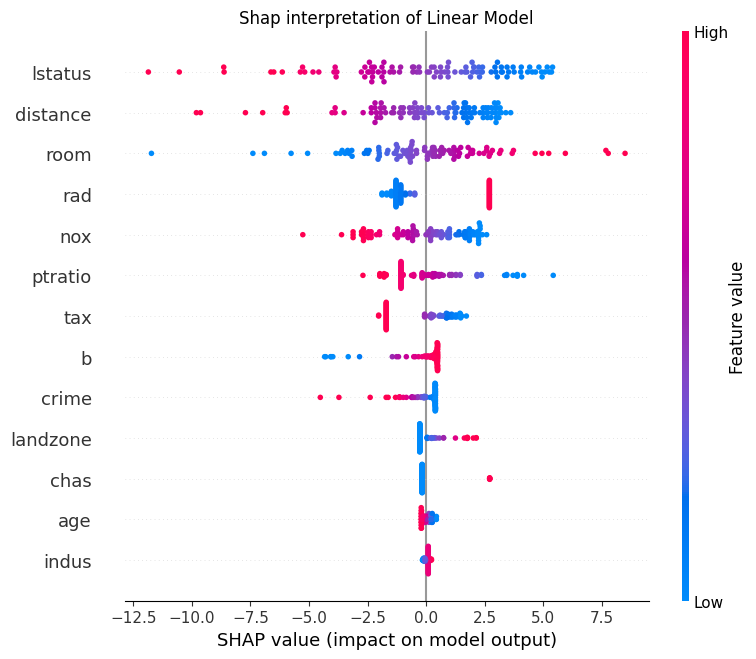

In [38]:
import shap

explainer = shap.Explainer(model_predict, masker=X_test.numpy())

shap_values = explainer.shap_values(X_test.numpy())

plt.title('Shap interpretation of Linear Model')
shap.summary_plot(shap_values, X_test, feature_names=features)
plt.show()

shap value of the decision tree model

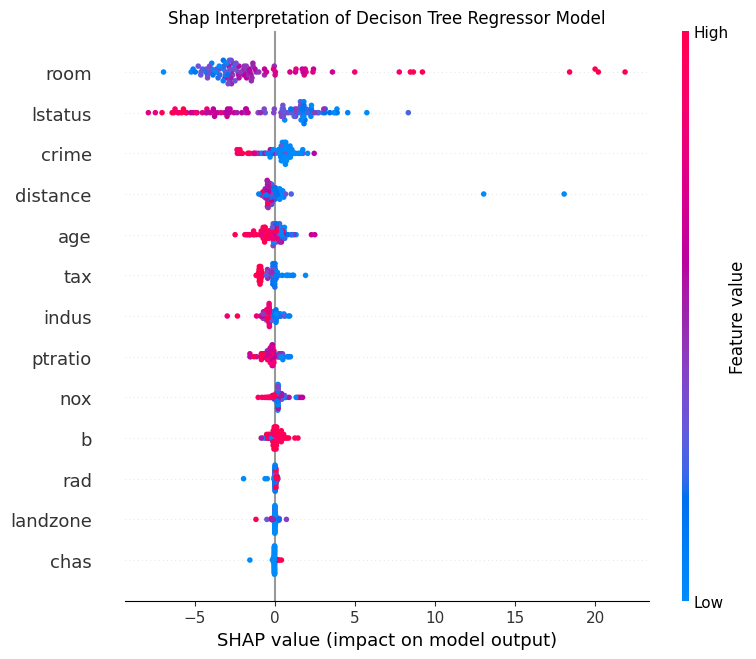

In [39]:
dtr_explainer = shap.TreeExplainer(dtr_model)

dtr_shap_values = dtr_explainer.shap_values(X_test.numpy())

plt.title('Shap Interpretation of Decison Tree Regressor Model')
shap.summary_plot(dtr_shap_values, X_test, feature_names=features)
plt.show()

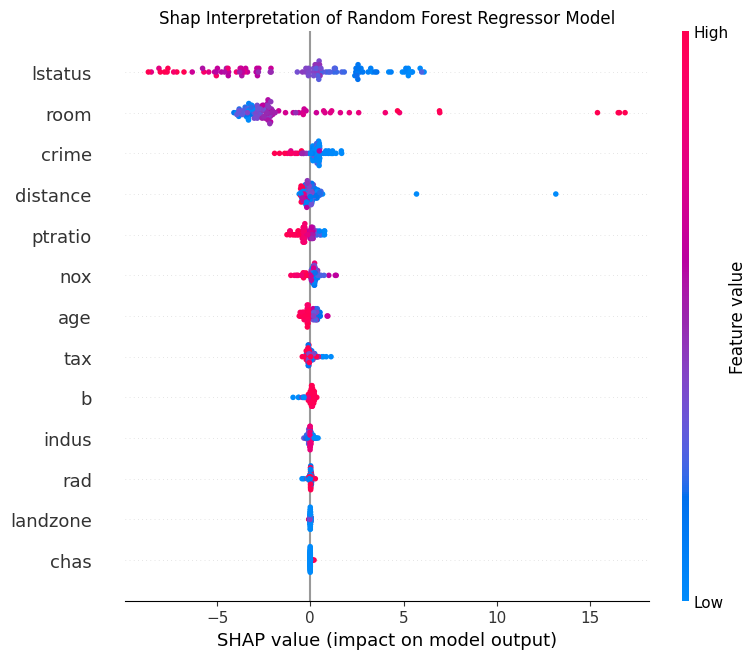

In [40]:

rfr_explainer = shap.TreeExplainer(rfr_model)

rfr_shap_values = rfr_explainer.shap_values(X_test.numpy())

plt.title('Shap Interpretation of Random Forest Regressor Model')
shap.summary_plot(rfr_shap_values, X_test, feature_names=features)
plt.show()

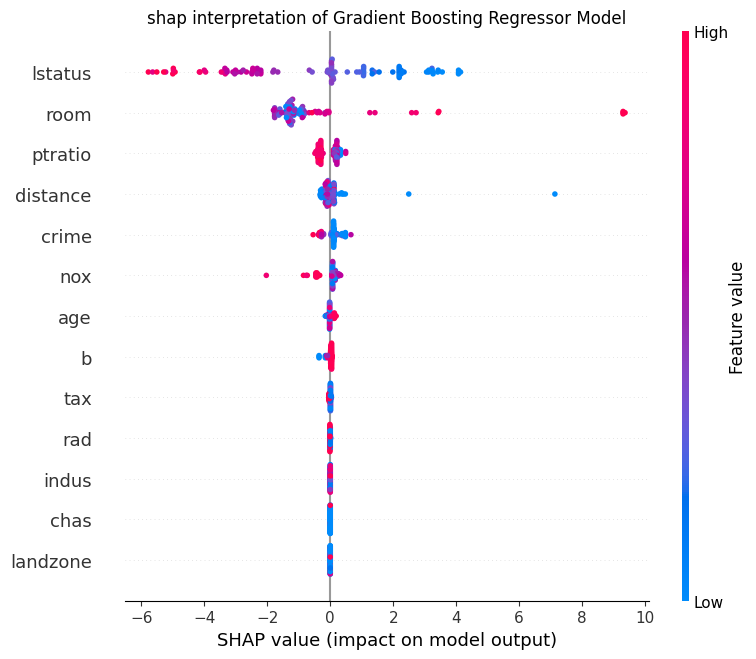

In [41]:

gbr_explainer = shap.TreeExplainer(gbr_model)

gbr_shap_values = gbr_explainer.shap_values(X_test.numpy())

plt.title('shap interpretation of Gradient Boosting Regressor Model')
shap.summary_plot(gbr_shap_values, X_test, feature_names=features)
plt.show()